In [1]:
!pip install keras --upgrade
!pip install tensorflow 

  Obtaining dependency information for keras from https://files.pythonhosted.org/packages/ca/48/643d21747d52fa380f572f76c493779fc5b4bd03605247209d2dd0a6d9a9/keras-3.0.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.2 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires keras<2.14,>=2.13.1, but you have keras 3.0.2 which is incompatible.
tensorflowjs 4.15.0 requires packaging~=23.1, but you have packaging 21.3 which is incompatible.
  Obtaining dependency information for keras<2.14,>=2.13.1 from https://files.pythonhosted.org/packages/2e/f3/19da7511b45e80216cbbd9467137b2d28919c58ba1ccb971435cb631e470/keras-2.13.1-py3-none-any.whl.metadata

### Notebook Imports

In [2]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Preload the dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

### Building the Neural Network

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]), 
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),       
    tf.keras.layers.Dense(10, activation="softmax")])

### Building the Model 

In [7]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

### Training and evaluating the model

In [8]:
model_history = model.fit(X_train, y_train, epochs=40, validation_data=(X_valid, y_valid))

Epoch 1/40
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7226 - accuracy: 0.7632 - val_loss: 0.5117 - val_accuracy: 0.8342
Epoch 2/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4873 - accuracy: 0.8309 - val_loss: 0.4583 - val_accuracy: 0.8430
Epoch 3/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4431 - accuracy: 0.8457 - val_loss: 0.4728 - val_accuracy: 0.8322
Epoch 4/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4156 - accuracy: 0.8550 - val_loss: 0.4053 - val_accuracy: 0.8602
Epoch 5/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3961 - accuracy: 0.8611 - val_loss: 0.3965 - val_accuracy: 0.8666
Epoch 6/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3783 - accuracy: 0.8679 - val_loss: 0.3758 - val_accuracy: 0.8690
Epoch 7/40
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8725 - val_loss: 0.3751 - val_accuracy:

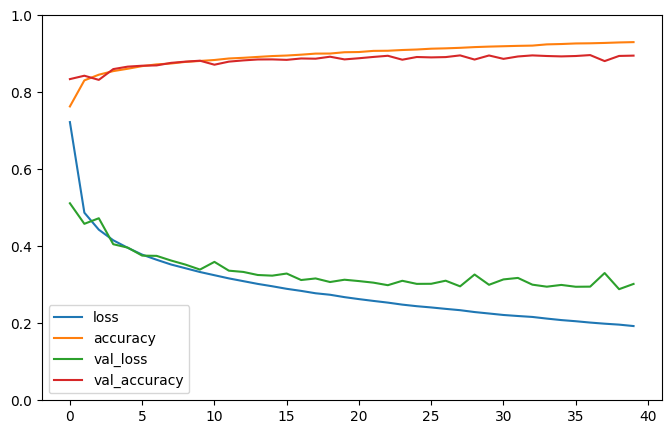

In [9]:
pd.DataFrame(model_history.history).plot(figsize=(8, 5))
plt.gca().set_ylim(0, 1) 
plt.show()